<a href="https://colab.research.google.com/github/ssepulvedag3/Optimal-operation-with-deficit-of-generation/blob/main/Codigos_Operacion_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flujo carga DC


## Gauss-Jacobi


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import cvxpy as cv
import decimal

feeder = pd.read_csv('benchmark_33_nodes.csv')
G = nx.DiGraph()
G.add_node(1,name='slack',d=0)

for k in range(len(feeder)):
  gkm = feeder['Rpu'][k]
  dk = feeder['Ppu'][k]
  G.add_node(feeder['To'][k],name=feeder['To'][k],d=dk)
  G.add_edge(feeder['From'][k],feeder['To'][k],g=1/gkm,thlim=1)




A=nx.incidence_matrix(G,oriented=True)
Gp=np.diag([G.edges[k]['g'] for k in G.edges])
Gbus=A@Gp@A.T

n=G.number_of_nodes()
GN0=Gbus[1:n,0]
GNN=Gbus[1:n,1:n]
d=np.array([G.nodes[k]['d'] for k in G.nodes])
name=np.array([G.nodes[k]['name'] for k in G.nodes])

tmax=10000
error=1e-10
Vo=np.ones(n,dtype=float)
V=Vo.copy()
#Vkt+1 = (1/Gkk)*(Pk/Vkt - sum(Gkj*Vjt,k~=j))

err=[]
for t in range(tmax):
  for k in range(n):
    sum=0
    for j in range(n):
      if j!=k:
        sum=sum+Gbus[k][j]*Vo[j]
    if name[k]!='slack':
      V[k]=(1/Gbus[k][k])*(-d[k]/Vo[k]-sum)
  err.append(np.max(np.abs(V-Vo)))
  if np.max(np.abs(V-Vo))<=error:
    print("El número de iteraciones fue: ",t)
    break
  else:
    Vo=V.copy()


err_Gauss_Jac=np.array(err)
print(V)

El número de iteraciones fue:  4561
[1.         0.99778611 0.98736394 0.98200341 0.97671229 0.96565536
 0.96432921 0.95441995 0.94980277 0.94555067 0.94482469 0.94355342
 0.93915127 0.93774304 0.93667823 0.93563188 0.93434038 0.93390025
 0.99741596 0.99486778 0.9944052  0.99400473 0.98469041 0.97988153
 0.9774956  0.96443153 0.96282849 0.95726691 0.95335796 0.95128974
 0.94859691 0.94804516 0.94791049]


## Gauss-Seidel

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import cvxpy as cv
import decimal

feeder = pd.read_csv('benchmark_33_nodes.csv')
G = nx.DiGraph()
G.add_node(1,name='slack',d=0)

for k in range(len(feeder)):
  gkm = feeder['Rpu'][k]
  dk = feeder['Ppu'][k]
  G.add_node(feeder['To'][k],name=feeder['To'][k],d=dk)
  G.add_edge(feeder['From'][k],feeder['To'][k],g=1/gkm,thlim=1)



A=nx.incidence_matrix(G,oriented=True)
Gp=np.diag([G.edges[k]['g'] for k in G.edges])
Gbus=A@Gp@A.T

n=G.number_of_nodes()
GN0=Gbus[1:n,0]
GNN=Gbus[1:n,1:n]
d=np.array([G.nodes[k]['d'] for k in G.nodes])
name=np.array([G.nodes[k]['name'] for k in G.nodes])

tmax=10000
error=1e-10
Vo=np.ones(n,dtype=float)
V=Vo.copy()
#Vkt+1 = (1/Gkk)*(Pk/Vkt - sum(Gkj*Vjt,k~=j))

err=[]
for t in range(tmax):
  for k in range(n):
    sum=0
    for j in range(n):
      if j!=k:
        sum=sum+Gbus[k][j]*V[j]
    if name[k]!='slack':
      V[k]=(1/Gbus[k][k])*(-d[k]/V[k]-sum)
  err.append(np.max(np.abs(V-Vo)))
  if np.max(np.abs(V-Vo))<=error:
    print("El número de iteraciones fue: ",t)
    break
  else:
    Vo=V.copy()


err_Gauss_Seid=np.array(err)
print(V)

El número de iteraciones fue:  2383
[1.         0.99778611 0.98736394 0.98200341 0.97671229 0.96565535
 0.9643292  0.95441994 0.94980276 0.94555065 0.94482468 0.9435534
 0.93915126 0.93774303 0.93667822 0.93563187 0.93434037 0.93390023
 0.99741595 0.99486778 0.9944052  0.99400473 0.98469041 0.97988152
 0.9774956  0.96443153 0.96282848 0.9572669  0.95335796 0.95128973
 0.9485969  0.94804515 0.94791048]


## Aproximación diagonal


El número de iteraciones fue:  7
[6.26117518e-02 3.30366989e-03 1.74772664e-04 9.09324129e-06
 4.69776509e-07 2.42018773e-08 1.24543165e-09 6.40811848e-11]
[0.99778611 0.98736393 0.9820034  0.97671228 0.96565535 0.96432919
 0.95441993 0.94980275 0.94555064 0.94482466 0.94355339 0.93915124
 0.93774301 0.9366782  0.93563185 0.93434035 0.93390022 0.99741595
 0.99486778 0.9944052  0.99400473 0.98469041 0.97988152 0.97749559
 0.96443152 0.96282848 0.95726689 0.95335795 0.95128972 0.94859689
 0.94804514 0.94791047]


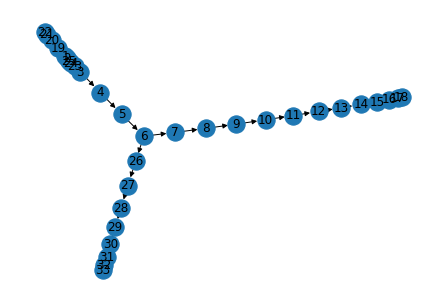

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import cvxpy as cv
import decimal

feeder = pd.read_csv('benchmark_33_nodes.csv')
G = nx.DiGraph()
G.add_node(1,name='slack',d=0)

for k in range(len(feeder)):
  gkm = feeder['Rpu'][k]
  dk = feeder['Ppu'][k]
  G.add_node(feeder['To'][k],name=feeder['To'][k],d=dk)
  G.add_edge(feeder['From'][k],feeder['To'][k],g=1/gkm,thlim=1)



nx.draw(G,with_labels=True,pos=nx.spectral_layout(G))

A=nx.incidence_matrix(G,oriented=True)
Gp=np.diag([G.edges[k]['g'] for k in G.edges])
Gbus=A@Gp@A.T

n=G.number_of_nodes()
GN0=Gbus[1:n,0]
GNN=Gbus[1:n,1:n]
d=np.array([G.nodes[k]['d'] for k in G.nodes])
name=np.array([G.nodes[k]['name'] for k in G.nodes])
p=d[1:n]

tmax=100
error=1e-10
Vo=np.ones(n,dtype=float)
Vs=Vo[1]
Vt=np.ones(n-1,dtype=float)
Vd=Vt.copy()

#Vdt+1 = -(diag(Vdt)*Ydd)^(-1)(diag(Yds*Vs)*Vdt+Pd) Aprox. Diagonal

err=[]
for t in range(tmax):
  Vd=-np.linalg.inv(np.diag(Vt)@GNN)@(p+np.diag(GN0*Vs)@Vt)
  err.append(np.max(np.abs(Vd-Vt)))
  if np.max(np.abs(Vd-Vt))<=error:
    print("El número de iteraciones fue: ",t)
    break
  else:
    Vt=Vd.copy()

err_Aprox_Diag=np.array(err)
print(err_Aprox_Diag)
print(Vt)

##Aproximaciones sucesivas


El número de iteraciones fue:  7
[0.99778611 0.98736393 0.9820034  0.97671228 0.96565535 0.96432919
 0.95441993 0.94980275 0.94555064 0.94482466 0.94355339 0.93915124
 0.93774301 0.9366782  0.93563185 0.93434035 0.93390022 0.99741595
 0.99486778 0.9944052  0.99400473 0.98469041 0.97988152 0.97749559
 0.96443152 0.96282848 0.95726689 0.95335795 0.95128972 0.94859689
 0.94804514 0.94791047]


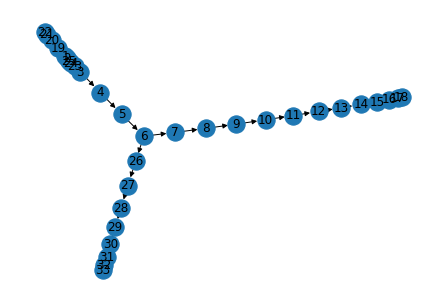

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import cvxpy as cv
import decimal

feeder = pd.read_csv('benchmark_33_nodes.csv')
G = nx.DiGraph()
G.add_node(1,name='slack',d=0)

for k in range(len(feeder)):
  gkm = feeder['Rpu'][k]
  dk = feeder['Ppu'][k]
  G.add_node(feeder['To'][k],name=feeder['To'][k],d=dk)
  G.add_edge(feeder['From'][k],feeder['To'][k],g=1/gkm,thlim=1)



nx.draw(G,with_labels=True,pos=nx.spectral_layout(G))

A=nx.incidence_matrix(G,oriented=True)
Gp=np.diag([G.edges[k]['g'] for k in G.edges])
Gbus=A@Gp@A.T

n=G.number_of_nodes()
GN0=Gbus[1:n,0]
GNN=Gbus[1:n,1:n]
d=np.array([G.nodes[k]['d'] for k in G.nodes])
name=np.array([G.nodes[k]['name'] for k in G.nodes])
p=d[1:n]

tmax=100
error=1e-10
Vo=np.ones(n,dtype=float)
Vs=Vo[1]
Vt=np.ones(n-1,dtype=float)
Vd=Vt.copy()

#Vdt+1 = -(Ydd - diag^{-2}(Vdt)*diag(Pd))^(-1)(Yds*Vs + 2diag^{-1}(Vdt)Pd) Aprox. Hiperbólica

err=[]
for t in range(tmax):
  Vd=-np.linalg.inv(GNN)@(GN0*Vs + np.diag(1/Vt)@p)
  err.append(np.max(np.abs(Vd-Vt)))
  if np.max(np.abs(Vd-Vt))<=error:
    print("El número de iteraciones fue: ",t)
    break
  else:
    Vt=Vd.copy()

err_Aprox_Suce=np.array(err)
print(Vt)

## Método triangular


El número de iteraciones fue:  7
[0.99778572 0.98624876 0.98287961 0.97774238 0.97158203 0.96652561
 0.96132586 0.96038034 0.95943414 0.95212496 0.9480297  0.94430534
 0.94367923 0.94278393 0.93985644 0.9389921  0.93828454 0.93783769
 0.98329873 0.98204148 0.98031804 0.98008342 0.97880649 0.97605101
 0.97570954 0.96492614 0.95937697 0.95547675 0.95341315 0.95072636
 0.95017585 0.95004148]


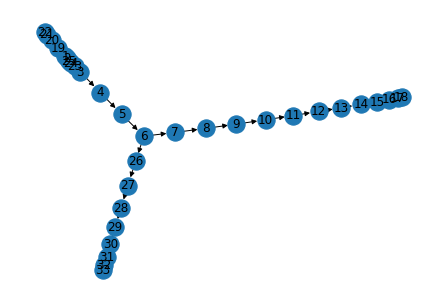

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import cvxpy as cv
import decimal

feeder = pd.read_csv('benchmark_33_nodes.csv')
G = nx.DiGraph()
G.add_node(1,name='slack',d=0)

for k in range(len(feeder)):
  gkm = feeder['Rpu'][k]
  dk = feeder['Ppu'][k]
  G.add_node(feeder['To'][k],name=feeder['To'][k],d=dk)
  G.add_edge(feeder['From'][k],feeder['To'][k],g=1/gkm,thlim=1,r=gkm)



nx.draw(G,with_labels=True,pos=nx.spectral_layout(G))

A=nx.incidence_matrix(G,oriented=True)
Gp=np.diag([G.edges[k]['g'] for k in G.edges])
Rp=np.diag([G.edges[k]['r'] for k in G.edges])
Gbus=A@Gp@A.T
Rbus=np.linalg.inv(Gbus)

n=G.number_of_nodes()
GN0=Gbus[1:n,0]
GNN=Gbus[1:n,1:n]
RNN=Rbus[1:n,1:n]
d=np.array([G.nodes[k]['d'] for k in G.nodes])
name=np.array([G.nodes[k]['name'] for k in G.nodes])
p=d[1:n]

tmax=100
error=1e-10
Vo=np.ones(n,dtype=float)
Vs=Vo[1]
Vt=np.ones(n-1,dtype=float)
Vd=Vt.copy()

T=np.zeros((G.number_of_nodes(),G.number_of_nodes()))
for k in range(G.number_of_edges()):
  T[k+1,k]=1
  for i in list(nx.edge_dfs(G,k+1)):
    T[k+1,i[1]-1]=1


Tsup=T[1:,:-1]
Rbus=Tsup.T@Rp@Tsup

#Vdt+1 = Vd=np.ones(n-1)*1+Rbus@np.diag(1/Vt)@p Aprox. triang

err=[]
for t in range(tmax):
  Vd=np.ones(n-1)*1-Rbus@np.diag(1/Vt)@p
  err.append(np.max(np.abs(Vd-Vt)))
  if np.max(np.abs(Vd-Vt))<=error:
    print("El número de iteraciones fue: ",t)
    break
  else:
    Vt=Vd.copy()

err_Triang=np.array(err)     
print(Vt)     


## Barrido iterativo Matricial

El número de iteraciones fue:  7
[0.99778611 0.98736393 0.9820034  0.97671228 0.96565535 0.96432919
 0.95441993 0.94980275 0.94555064 0.94482466 0.94355339 0.93915124
 0.93774301 0.9366782  0.93563185 0.93434035 0.93390022 0.99741595
 0.99486778 0.9944052  0.99400473 0.98469041 0.97988152 0.97749559
 0.96443152 0.96282848 0.95726689 0.95335795 0.95128972 0.94859689
 0.94804514 0.94791047]


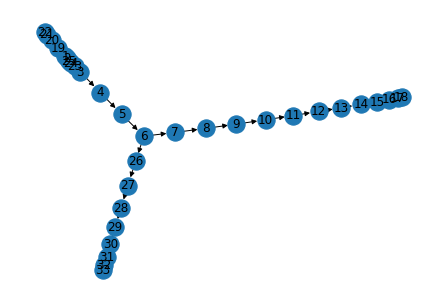

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import cvxpy as cv
import decimal

feeder = pd.read_csv('benchmark_33_nodes.csv')
G = nx.DiGraph()
G.add_node(1,name='slack',d=0)

for k in range(len(feeder)):
  gkm = feeder['Rpu'][k]
  dk = feeder['Ppu'][k]
  G.add_node(feeder['To'][k],name=feeder['To'][k],d=dk)
  G.add_edge(feeder['From'][k],feeder['To'][k],g=1/gkm,thlim=1)



nx.draw(G,with_labels=True,pos=nx.spectral_layout(G))

A=nx.incidence_matrix(G,oriented=True)
Gp=np.diag([G.edges[k]['g'] for k in G.edges])
Gbus=A@Gp@A.T


n=G.number_of_nodes()
L=G.number_of_edges()
GN0=Gbus[1:n,0]
GNN=Gbus[1:n,1:n]
d=np.array([G.nodes[k]['d'] for k in G.nodes])
name=np.array([G.nodes[k]['name'] for k in G.nodes])
p=d[1:n]

tmax=100
error=1e-10
Vo=np.ones(n,dtype=float)
Vs=Vo[1]
Vt=np.ones(n-1,dtype=float)
Vd=Vt.copy()
Ad=A.T[:,1:]
As=A.T[:,0]


#Vdt+1 = -(Ydd - diag^{-2}(Vdt)*diag(Pd))^(-1)(Yds*Vs + 2diag^{-1}(Vdt)Pd) Aprox. barrido iterativo matriical

Vd=-np.linalg.inv(Ad.T@Gp@Ad)@((Ad.T@Gp@As)*Vs + np.diag(1/Vt)@p)


err=[]
for t in range(tmax):
  Vd=-np.linalg.inv(Ad.T@Gp@Ad)@(((Ad.T@Gp@As).reshape(32))*Vs + np.diag(1/Vt)@p)
  err.append(np.max(np.abs(Vd-Vt)))
  if np.max(np.abs(Vd-Vt))<=error:
    print("El número de iteraciones fue: ",t)
    break
  else:
    Vt=Vd.copy()

err_Barr_matr=np.array(err)
print(Vd)


## Newton Rhapson


El número de iteraciones fue:  4
[1.         0.99778611 0.98736393 0.9820034  0.97671228 0.96565535
 0.96432919 0.95441993 0.94980275 0.94555064 0.94482466 0.94355339
 0.93915124 0.93774301 0.9366782  0.93563185 0.93434035 0.93390022
 0.99741595 0.99486778 0.9944052  0.99400473 0.98469041 0.97988152
 0.97749559 0.96443152 0.96282848 0.95726689 0.95335795 0.95128972
 0.94859689 0.94804514 0.94791047]


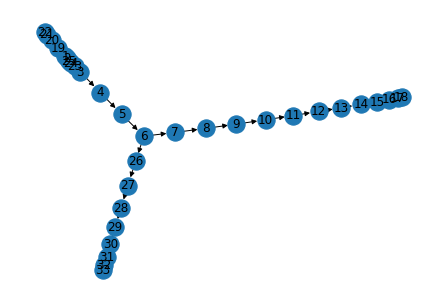

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import cvxpy as cv
import decimal

feeder = pd.read_csv('benchmark_33_nodes.csv')
G = nx.DiGraph()
G.add_node(1,name='slack',d=0)

for k in range(len(feeder)):
  gkm = feeder['Rpu'][k]
  dk = feeder['Ppu'][k]
  G.add_node(feeder['To'][k],name=feeder['To'][k],d=dk)
  G.add_edge(feeder['From'][k],feeder['To'][k],g=1/gkm,thlim=1)



nx.draw(G,with_labels=True,pos=nx.spectral_layout(G))

A=nx.incidence_matrix(G,oriented=True)
Gp=np.diag([G.edges[k]['g'] for k in G.edges])
Gbus=A@Gp@A.T

n=G.number_of_nodes()
GN0=Gbus[1:n,0]
GNN=Gbus[1:n,1:n]
d=np.array([G.nodes[k]['d'] for k in G.nodes])
name=np.array([G.nodes[k]['name'] for k in G.nodes])
p=d[1:n]

tmax=100
error=1e-10
Vo=np.ones(n,dtype=float)
Vs=Vo[1]
Vt=np.ones(n-1,dtype=float)
Vd=Vt.copy()

F=np.zeros(n)
J=np.zeros((n,n))
Z=np.zeros((n,n))
#Vdt+1=inv(diag(GN0*Vs+GNN*Vt)+np.diag(Vt)*GNN)*(diag(Vt)*GNN*Vt-p)

err=[]
for t in range(tmax):
  for k in range(n):
    J[k][k]=Gbus[k][k]*Vo[k]
    F[k]=d[k]
    for j in range(n):   
      J[k][k]=J[k][k]+Gbus[k][j]*Vo[j]
      F[k]=F[k]+Vo[k]*Gbus[k][j]*Vo[j]
      if j!=k:
        J[k][j]=Vo[k]*Gbus[k][j]  

  Vd=Vo[1:n]-np.linalg.inv(J[1:n,1:n])@F[1:n]
  err.append(np.max(np.abs(Vd-Vo[1:n])))
  if np.max(np.abs(Vd-Vo[1:n]))<=error:
    print("El número de iteraciones fue: ",t)
    break
  else:
    Vo[1:n]=Vd.copy()

err_Newton_Rhapson=np.array(err)
print(Vo)


## Método Hiperbólico

El número de iteraciones fue:  3
[0.99778611 0.98736393 0.9820034  0.97671228 0.96565535 0.96432919
 0.95441993 0.94980275 0.94555064 0.94482466 0.94355339 0.93915124
 0.93774301 0.9366782  0.93563185 0.93434035 0.93390022 0.99741595
 0.99486778 0.9944052  0.99400473 0.98469041 0.97988152 0.97749559
 0.96443152 0.96282848 0.95726689 0.95335795 0.95128972 0.94859689
 0.94804514 0.94791047]


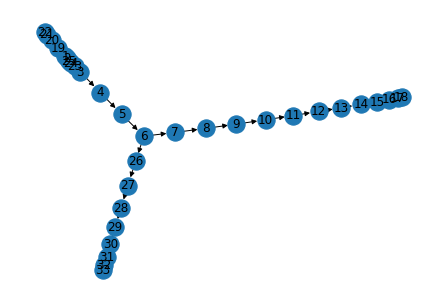

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import cvxpy as cv
import decimal

feeder = pd.read_csv('benchmark_33_nodes.csv')
G = nx.DiGraph()
G.add_node(1,name='slack',d=0)

for k in range(len(feeder)):
  gkm = feeder['Rpu'][k]
  dk = feeder['Ppu'][k]
  G.add_node(feeder['To'][k],name=feeder['To'][k],d=dk)
  G.add_edge(feeder['From'][k],feeder['To'][k],g=1/gkm,thlim=1)



nx.draw(G,with_labels=True,pos=nx.spectral_layout(G))

A=nx.incidence_matrix(G,oriented=True)
Gp=np.diag([G.edges[k]['g'] for k in G.edges])
Gbus=A@Gp@A.T

n=G.number_of_nodes()
GN0=Gbus[1:n,0]
GNN=Gbus[1:n,1:n]
d=np.array([G.nodes[k]['d'] for k in G.nodes])
name=np.array([G.nodes[k]['name'] for k in G.nodes])
p=d[1:n]

tmax=100
error=1e-10
Vo=np.ones(n,dtype=float)
Vs=Vo[1]
Vt=np.ones(n-1,dtype=float)
Vd=Vt.copy()

#Vdt+1 = -(Ydd - diag^{-2}(Vdt)*diag(Pd))^(-1)(Yds*Vs + 2diag^{-1}(Vdt)Pd) Aprox. Hiperbólica

err=[]
for t in range(tmax):
  Vd=-np.linalg.inv((GNN - np.diag(1/(Vt**2))*np.diag(p)))@(GN0*Vs + 2*np.diag(1/Vt)@p)
  err.append(np.max(np.abs(Vd-Vt)))
  if np.max(np.abs(Vd-Vt))<=error:
    print("El número de iteraciones fue: ",t)
    break
  else:
    Vt=Vd.copy()

err_aprox_hyper=np.array(err)
print(Vt)

## Aproximación producto

El número de iteraciones fue:  4
[0.99778611 0.98736393 0.9820034  0.97671228 0.96565535 0.96432919
 0.95441993 0.94980275 0.94555064 0.94482466 0.94355339 0.93915124
 0.93774301 0.9366782  0.93563185 0.93434035 0.93390022 0.99741595
 0.99486778 0.9944052  0.99400473 0.98469041 0.97988152 0.97749559
 0.96443152 0.96282848 0.95726689 0.95335795 0.95128972 0.94859689
 0.94804514 0.94791047]


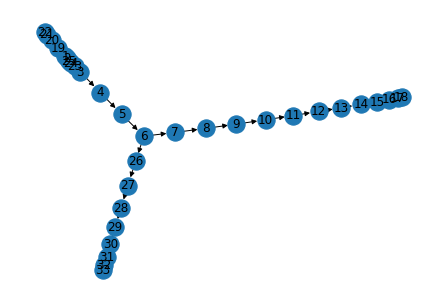

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import cvxpy as cv
import decimal

feeder = pd.read_csv('benchmark_33_nodes.csv')
G = nx.DiGraph()
G.add_node(1,name='slack',d=0)

for k in range(len(feeder)):
  gkm = feeder['Rpu'][k]
  dk = feeder['Ppu'][k]
  G.add_node(feeder['To'][k],name=feeder['To'][k],d=dk)
  G.add_edge(feeder['From'][k],feeder['To'][k],g=1/gkm,thlim=1)



nx.draw(G,with_labels=True,pos=nx.spectral_layout(G))

A=nx.incidence_matrix(G,oriented=True)
Gp=np.diag([G.edges[k]['g'] for k in G.edges])
Gbus=A@Gp@A.T

n=G.number_of_nodes()
GN0=Gbus[1:n,0]
GNN=Gbus[1:n,1:n]
d=np.array([G.nodes[k]['d'] for k in G.nodes])
name=np.array([G.nodes[k]['name'] for k in G.nodes])
p=d[1:n]

tmax=100
error=1e-10
Vo=np.ones(n,dtype=float)
Vs=Vo[1]
Vt=np.ones(n-1,dtype=float)
Vd=Vt.copy()

#Vdt+1=inv(diag(GN0*Vs+GNN*Vt)+np.diag(Vt)*GNN)*(diag(Vt)*GNN*Vt-p)

err=[]
for t in range(tmax):
  Vd=np.linalg.inv(np.diag(GN0*Vs+GNN@Vt)+np.diag(Vt)@GNN)@(np.diag(Vt)@GNN@Vt-p)
  err.append(np.max(np.abs(Vd-Vt)))
  if np.max(np.abs(Vd-Vt))<=error:
    print("El número de iteraciones fue: ",t)
    break
  else:
    Vt=Vd.copy()

err_Aprox_product=np.array(err)
print(Vt)


##Gráficas Convergencia 

###Gauss Seidel y Gauss Jacobi

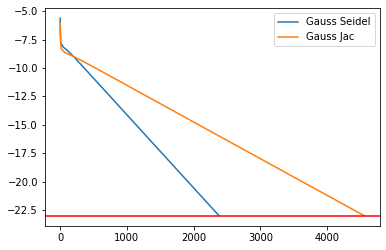

In [10]:
plt.figure()
plt.plot(np.log(err_Gauss_Seid),'-',label="Gauss Seidel")
plt.plot(np.log(err_Gauss_Jac),'-',label="Gauss Jac")
plt.axhline(np.log(error),color="red")
plt.legend()


###Demás métodos

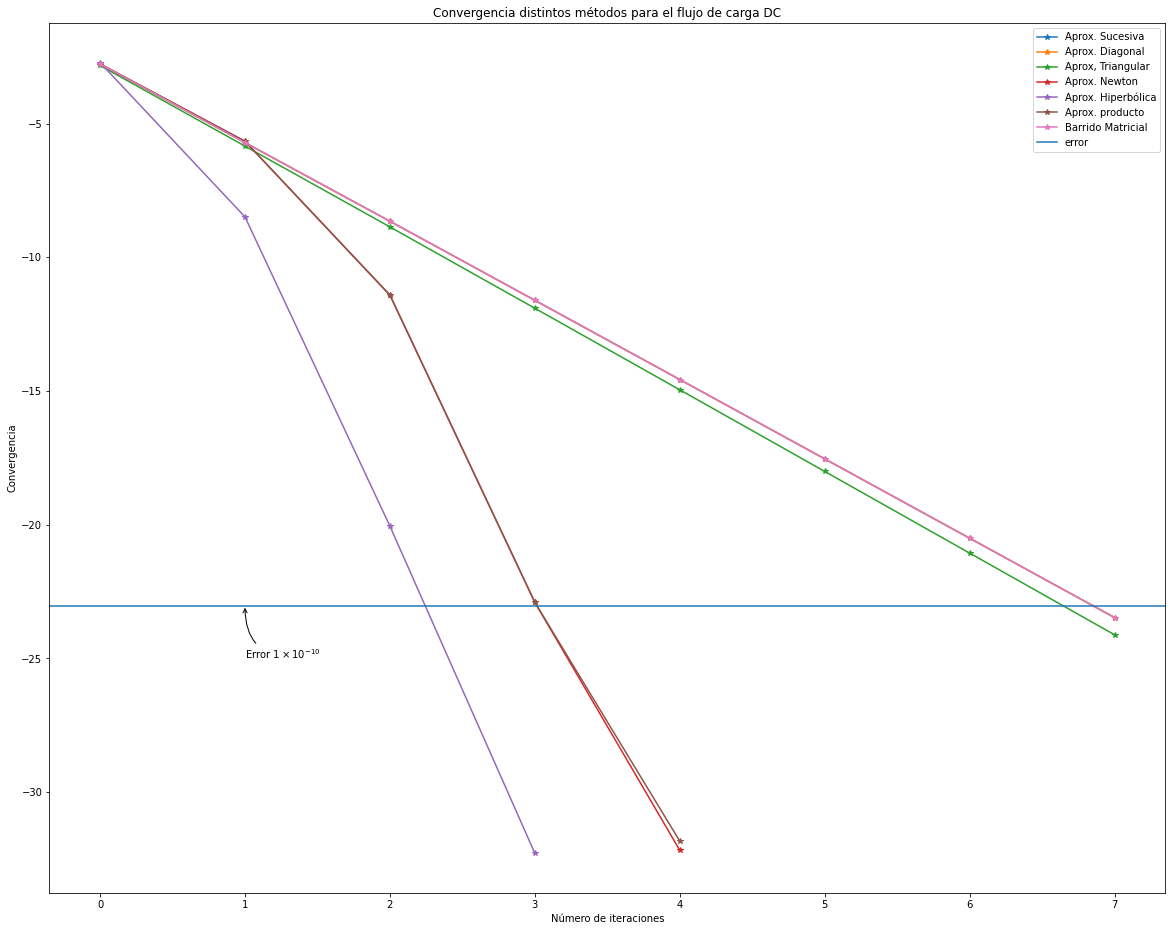

In [18]:
plt.figure(figsize=(20,16))
plt.plot(np.log(err_Aprox_Suce),'*-',label="Aprox. Sucesiva")
plt.plot(np.log(err_Aprox_Diag),'*-',label="Aprox. Diagonal")
plt.plot(np.log(err_Triang),'*-',label="Aprox, Triangular")
plt.plot(np.log(err_Newton_Rhapson),'*-',label="Aprox. Newton")
plt.plot(np.log(err_aprox_hyper),'*-',label="Aprox. Hiperbólica")
plt.plot(np.log(err_Aprox_product),'*-',label="Aprox. producto")
plt.plot(np.log(err_Barr_matr),'*-',label="Barrido Matricial")
plt.axhline(np.log(error), label="error")
plt.xlabel("Número de iteraciones")
plt.ylabel("Convergencia")
plt.annotate(r'Error $1 \times 10^{-10}$', xy=(1, np.log(error)), xytext=(1, -25),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
plt.title("Convergencia distintos métodos para el flujo de carga DC")
plt.legend()
